In [167]:
%matplotlib inline

import os
import sys
import re
import nltk
import json
import gensim
import dateutil
import datetime
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import advertools as adv
from scipy import sparse
from sklearn.svm import SVC
from functools import reduce
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from IPython.display import Image
from typing import List, Callable, Dict
from sklearn.metrics import r2_score
sns.set(style="ticks", color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, 'C://Users//jyoti//Desktop//NLP//NLP_project//NLP-project-//Models')
import utils

random_state=2022

In [168]:
path='C:\\Users\\jyoti\\Desktop\\NLP\\NLP_project\\NLP-project-\\Dataset\\'

In [169]:
df=pd.read_csv(path + 'final_dataset.csv')
industry=pd.read_csv(path+ 'Industry.csv')

C:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\IPython\core\interactiveshell.py:3229: DtypeWarning: Columns (6,9,14,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [170]:
dropped = ['profile_name', 'profile_image_link', 'biography','id','thumbnails', 'url', 'location','image_url','external_url','media_type','business_email','is_verified']
data = df.drop(dropped,axis=1)
data = data[data['account'].notna()]
data
# data.drop('account',axis=1)

,account,caption,following,likes,posts_count,followers,datetime,comments
10,chelsea_bridge_clinic,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14,47.0,1093.0,1.61278e+12,0
11,chelsea_bridge_clinic,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12,47.0,1093.0,1.61124e+12,0
12,numberoneedin,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100,343.0,4202.0,1.64529e+12,2
13,numberoneedin,Jerusalem Artichoke prepared as your first des...,308.0,81,343.0,4202.0,1.64366e+12,1
14,numberoneedin,Main course from our seasonal 7 course menu: B...,308.0,146,343.0,4202.0,1.64322e+12,1
...,...,...,...,...,...,...,...,...
74544,thesavoylondon,"Alongside hospitality, the performing arts hav...",599.0,4079,1933.0,167394.0,1.61073e+12,67
74545,thesavoylondon,This! Isn’t this what we are looking forward ...,599.0,1621,1933.0,167394.0,1.61055e+12,34
74546,thesavoylondon,"For those of you who are missing London town, ...",599.0,1548,1933.0,167394.0,1.61037e+12,28
74547,thesavoylondon,While we’re closed we’re going to try and keep...,599.0,2637,1933.0,167394.0,1.60994e+12,68


In [171]:
rm_list = []  

for i in range(data.shape[0]):
    if type(data["datetime"].values[i]) != float:
        rm_list.append(i)

len(rm_list)
for i in rm_list:
    data.drop([i], axis=0, inplace=True)

KeyboardInterrupt: 

In [ ]:
data.to_csv(path + '1.csv')

In [172]:
data1=pd.read_csv(path + '1.csv')

In [174]:
data1

,Unnamed: 0,account,caption,following,likes,posts_count,followers,datetime,comments
0,10,chelsea_bridge_clinic,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,1.612780e+12,0.0
1,11,chelsea_bridge_clinic,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,1.611240e+12,0.0
2,12,numberoneedin,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,1.645290e+12,2.0
3,13,numberoneedin,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,1.643660e+12,1.0
4,14,numberoneedin,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,1.643220e+12,1.0
...,...,...,...,...,...,...,...,...,...
41736,74544,thesavoylondon,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,1.610730e+12,67.0
41737,74545,thesavoylondon,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,1.610550e+12,34.0
41738,74546,thesavoylondon,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,1.610370e+12,28.0
41739,74547,thesavoylondon,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,1.609940e+12,68.0


In [175]:

df_industry=industry.rename(columns={'ACCOUNT':'account'})
df_industry.head()

data=pd.merge(data1, df_industry, on=['account'], how='left')

In [176]:
data['INDUSTRY'].value_counts()

hospitality           26800
cosmetics             13684
fitness                 588
retail                  218
sport & recreation      191
real estate             158
childcare                54
fashion                  48
Name: INDUSTRY, dtype: int64

C:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

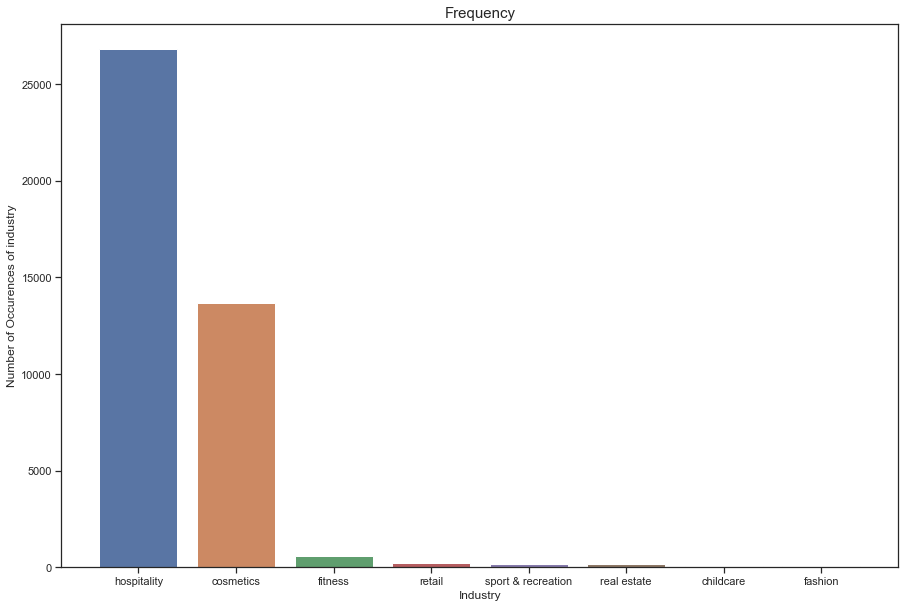

In [177]:
countIndustry=data['INDUSTRY'].value_counts()
plt.figure(figsize=(15,10))
sns.barplot(countIndustry.index,countIndustry.values)
plt.ylabel('Number of Occurences of industry',fontsize=12)
plt.xlabel('Industry',fontsize=12)
plt.title('Frequency',fontsize=15)
# plt.xticks(ticks=countDow.index,rotation='vertical')
plt.plot()

In [178]:
df = data[data['INDUSTRY'] == 'hospitality']

In [179]:
df['SUB-CATEGORY'].value_counts()

restaurant                       9676
hotel                            6494
bakery                           5591
café                             2445
brewery                           257
cocktail bar                      236
bar                               186
bar & grill                       182
breakfast & brunch restaurant     164
coffee / food shop                159
ice cream shop                    145
pub                               139
serviced apartments               138
wine bar & shop                   133
streetfood market                 125
chocolate shop                    125
fast food chain                   109
beer garden                        99
bar & kitchen                      99
pub & restaurant                   92
dessert shop                       92
wine bar                           43
doughnut shop                      36
empanadas store / delivery         30
pastry shop                         5
Name: SUB-CATEGORY, dtype: int64

C:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

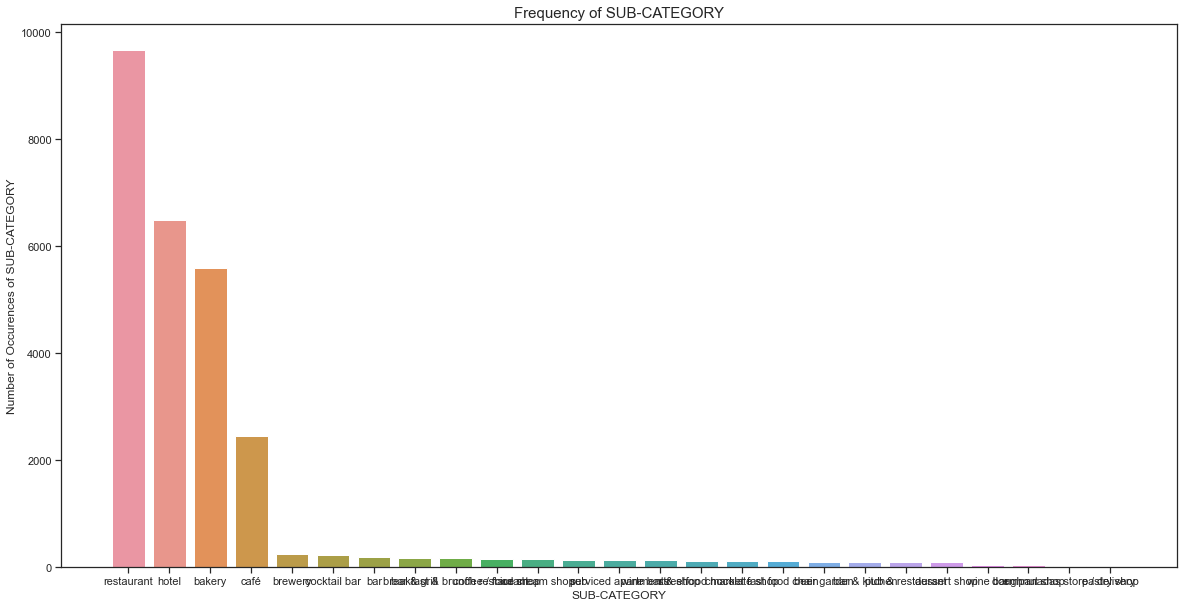

In [180]:
countSubIndustry=df['SUB-CATEGORY'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(countSubIndustry.index,countSubIndustry.values)
plt.ylabel('Number of Occurences of SUB-CATEGORY',fontsize=12)
plt.xlabel('SUB-CATEGORY',fontsize=12)
plt.title('Frequency of SUB-CATEGORY',fontsize=15)
# plt.xticks(ticks=countDow.index,rotation='vertical')
plt.plot()

In [181]:
data=df

In [182]:
data.drop(['account'], axis = 1,inplace=True)
data.drop(['Unnamed: 0'], axis = 1,inplace=True)
data.drop(['SUB-CATEGORY'], axis = 1,inplace=True)

In [183]:
#Converting the columns into the float datatype
a=['following','likes','posts_count','followers','comments']
for i in a:
  data[i]= data[i].astype(str).astype(float)
data

,caption,following,likes,posts_count,followers,datetime,comments,INDUSTRY,REGION
2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,1.645290e+12,2.0,hospitality,UK
3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,1.643660e+12,1.0,hospitality,UK
4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,1.643220e+12,1.0,hospitality,UK
5,North Sea Halibut with sea vegetables and Roya...,308.0,163.0,343.0,4202.0,1.627300e+12,7.0,hospitality,UK
6,Adding the final touches before welcoming our ...,308.0,251.0,343.0,4202.0,1.645200e+12,9.0,hospitality,UK
...,...,...,...,...,...,...,...,...,...
41736,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,1.610730e+12,67.0,hospitality,UK
41737,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,1.610550e+12,34.0,hospitality,UK
41738,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,1.610370e+12,28.0,hospitality,UK
41739,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,1.609940e+12,68.0,hospitality,UK


In [184]:
data = data[data['datetime'].notna()]

In [185]:
import datetime

def timeStampConversion(x):
    return datetime.datetime.fromtimestamp(int(x)/1000)

data['datetime'] = pd.to_numeric(data['datetime'], downcast="float")
data['datetime'] = data['datetime'].apply(lambda x: timeStampConversion(x)) 
data["datetime"] = pd.to_datetime(data["datetime"])

In [186]:
data['Dow'] = data['datetime'].dt.weekday
data['Hod']= data['datetime'].dt.hour
data['Date']= data['datetime'].dt.date

In [187]:
data

,caption,following,likes,posts_count,followers,datetime,comments,INDUSTRY,REGION,Dow,Hod,Date
2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,2022-02-19 18:01:01.824,2.0,hospitality,UK,5,18,2022-02-19
3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,2022-01-31 21:14:10.432,1.0,hospitality,UK,0,21,2022-01-31
4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,2022-01-26 19:00:41.728,1.0,hospitality,UK,2,19,2022-01-26
5,North Sea Halibut with sea vegetables and Roya...,308.0,163.0,343.0,4202.0,2021-07-26 13:47:16.608,7.0,hospitality,UK,0,13,2021-07-26
6,Adding the final touches before welcoming our ...,308.0,251.0,343.0,4202.0,2022-02-18 17:00:15.360,9.0,hospitality,UK,4,17,2022-02-18
...,...,...,...,...,...,...,...,...,...,...,...,...
41736,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,2021-01-15 18:00:45.440,67.0,hospitality,UK,4,18,2021-01-15
41737,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,2021-01-13 15:59:12.512,34.0,hospitality,UK,2,15,2021-01-13
41738,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,2021-01-11 13:59:50.656,28.0,hospitality,UK,0,13,2021-01-11
41739,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,2021-01-06 14:32:23.424,68.0,hospitality,UK,2,14,2021-01-06


C:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

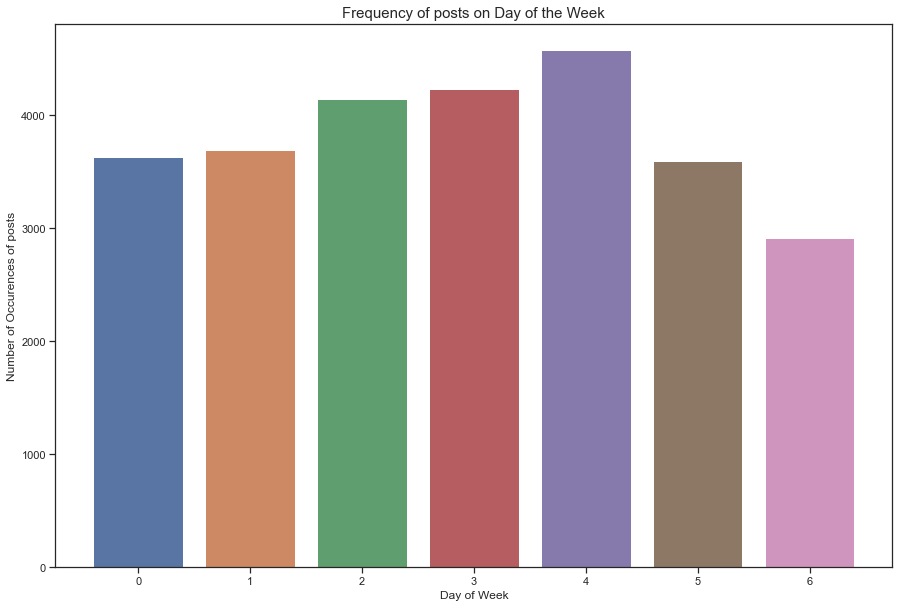

In [188]:
countDow=data['Dow'].value_counts()
plt.figure(figsize=(15,10))
sns.barplot(countDow.index,countDow.values)
plt.ylabel('Number of Occurences of posts',fontsize=12)
plt.xlabel('Day of Week',fontsize=12)
plt.title('Frequency of posts on Day of the Week',fontsize=15)
# plt.xticks(ticks=countDow.index,rotation='vertical')
plt.plot()

C:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


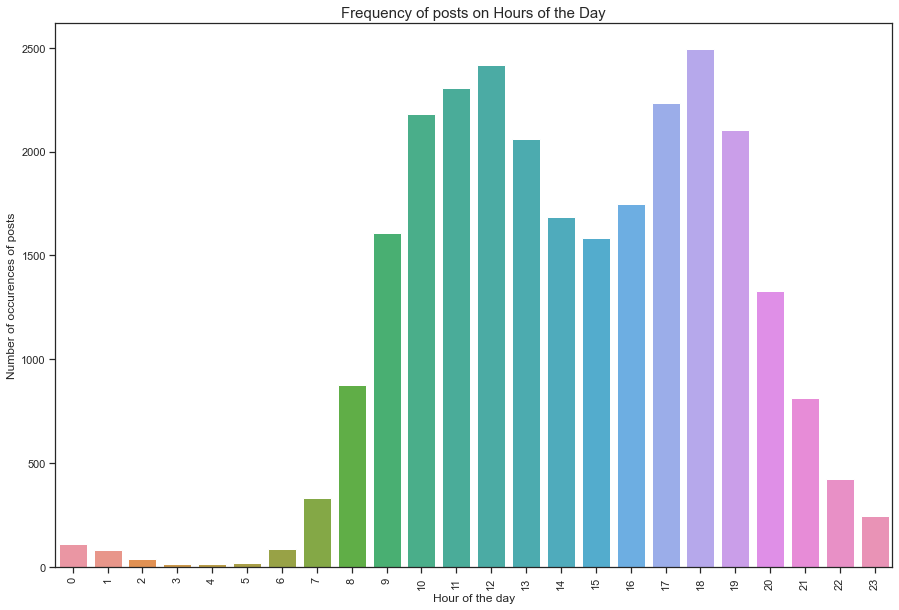

In [189]:
countHour=data['Hod'].value_counts()
plt.figure(figsize=(15,10))
sns.barplot(countHour.index,countHour.values)
plt.ylabel('Number of occurences of posts',fontsize=12)
plt.xlabel('Hour of the day',fontsize=12)
plt.title('Frequency of posts on Hours of the Day',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

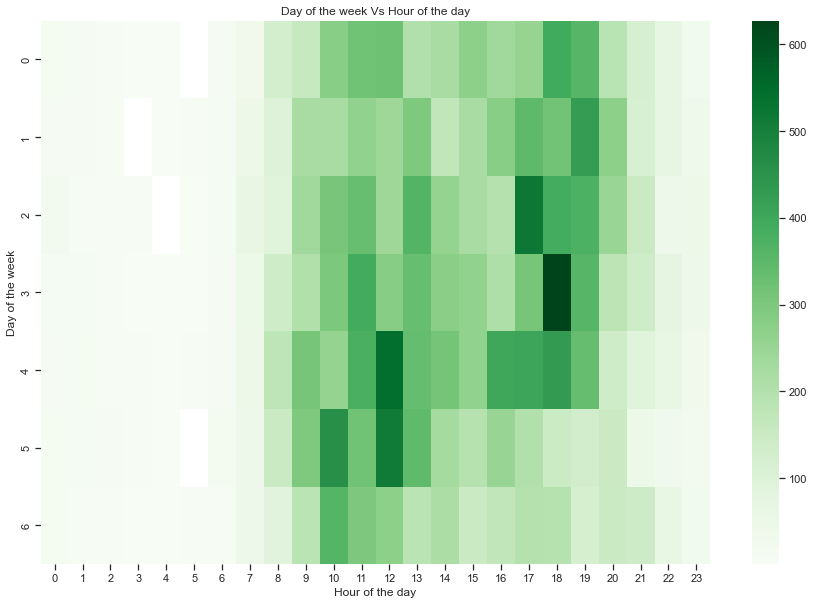

In [190]:
grp = data.groupby(['Dow','Hod'])['followers'].aggregate('count').reset_index()
grp = grp.pivot(index='Dow',columns='Hod',values='followers')
plt.figure(figsize=(15,10))
sns.heatmap(grp,cmap='Greens')
plt.title("Day of the week Vs Hour of the day")
plt.xlabel('Hour of the day')
plt.ylabel('Day of the week')
plt.show()

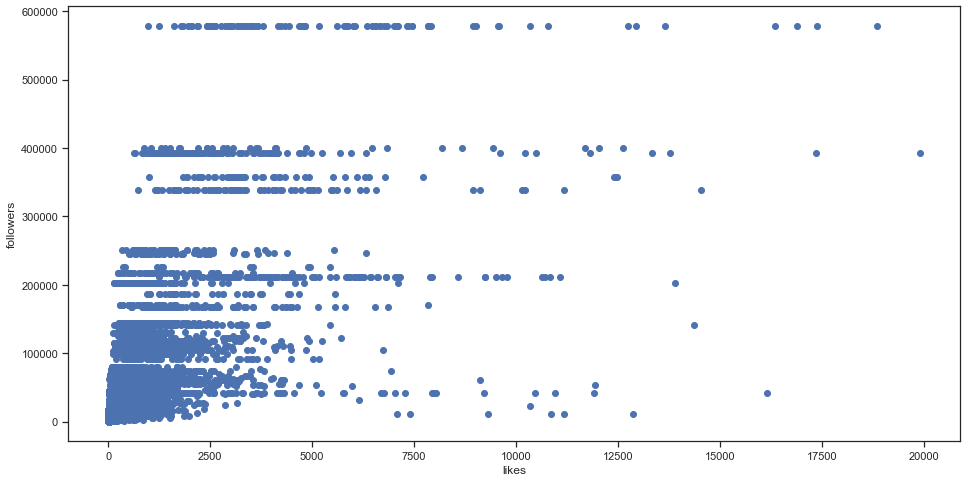

In [191]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['likes'], data['followers'])
ax.set_xlabel('likes')
ax.set_ylabel('followers')
plt.show()

In [192]:
data['mon']=(data['Dow']==0).astype(int)
data['tue']=(data['Dow']==1).astype(int)
data['wed']=(data['Dow']==2).astype(int)
data['thu']=(data['Dow']==3).astype(int)
data['fri']=(data['Dow']==4).astype(int)  
data['sat']=(data['Dow']==5).astype(int)
data['sun']=(data['Dow']==6).astype(int)

In [193]:
data = data.drop(['Dow'], axis=1)
data.drop(['datetime'], axis=1, inplace=True)

In [194]:
data.drop(['comments'], axis=1, inplace=True)
data.drop(['Date'], axis=1, inplace=True)
data=data.astype(str)

In [195]:
data

,caption,following,likes,posts_count,followers,INDUSTRY,REGION,Hod,mon,tue,wed,thu,fri,sat,sun
2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,hospitality,UK,18,0,0,0,0,0,1,0
3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,hospitality,UK,21,1,0,0,0,0,0,0
4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,hospitality,UK,19,0,0,1,0,0,0,0
5,North Sea Halibut with sea vegetables and Roya...,308.0,163.0,343.0,4202.0,hospitality,UK,13,1,0,0,0,0,0,0
6,Adding the final touches before welcoming our ...,308.0,251.0,343.0,4202.0,hospitality,UK,17,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,hospitality,UK,18,0,0,0,0,1,0,0
41737,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,hospitality,UK,15,0,0,1,0,0,0,0
41738,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,hospitality,UK,13,1,0,0,0,0,0,0
41739,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,hospitality,UK,14,0,0,1,0,0,0,0


In [196]:
def label(column):    
    le = preprocessing.LabelEncoder()
    le.fit(data[column])
    list(le.classes_)
    num=le.transform(data[column])
    data[column]=num

In [199]:
data

,caption,following,likes,posts_count,followers,INDUSTRY,REGION,Hod,mon,tue,wed,thu,fri,sat,sun
2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,hospitality,UK,18,0,0,0,0,0,1,0
3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,hospitality,UK,21,1,0,0,0,0,0,0
4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,hospitality,UK,19,0,0,1,0,0,0,0
5,North Sea Halibut with sea vegetables and Roya...,308.0,163.0,343.0,4202.0,hospitality,UK,13,1,0,0,0,0,0,0
6,Adding the final touches before welcoming our ...,308.0,251.0,343.0,4202.0,hospitality,UK,17,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,hospitality,UK,18,0,0,0,0,1,0,0
41737,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,hospitality,UK,15,0,0,1,0,0,0,0
41738,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,hospitality,UK,13,1,0,0,0,0,0,0
41739,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,hospitality,UK,14,0,0,1,0,0,0,0


In [200]:
label('INDUSTRY')
label('REGION')
data.drop(['INDUSTRY'], axis=1, inplace=True)
data.drop(['REGION'], axis=1, inplace=True)

In [201]:
data.to_csv(path + '2.csv')

In [202]:
data.drop(['caption'], axis=1, inplace=True)

In [203]:
df = pd.DataFrame(data)
data=df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

In [204]:
y=normalized_df["likes"]
X = normalized_df.drop('likes', axis=1)

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

In [206]:
#Converting the columns into the float datatype
a=['following','posts_count','Hod','mon','tue','wed','thu','fri','sat','sun']
for i in a:
  data[i]= data[i].astype(str).astype(float)
data

,following,likes,posts_count,followers,Hod,mon,tue,wed,thu,fri,sat,sun
2,308.0,100.0,343.0,4202.0,18.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,308.0,81.0,343.0,4202.0,21.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,308.0,146.0,343.0,4202.0,19.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,308.0,163.0,343.0,4202.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,308.0,251.0,343.0,4202.0,17.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
41736,599.0,4079.0,1933.0,167394.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41737,599.0,1621.0,1933.0,167394.0,15.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41738,599.0,1548.0,1933.0,167394.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
41739,599.0,2637.0,1933.0,167394.0,14.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [207]:

# utils.hyperparameterTuning_XGBoost(X_train,y_train)

## XGBoost 

In [208]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

Feature: 0, Score: 0.04964
Feature: 1, Score: 0.08147
Feature: 2, Score: 0.39369
Feature: 3, Score: 0.06217
Feature: 4, Score: 0.05944
Feature: 5, Score: 0.05787
Feature: 6, Score: 0.05270
Feature: 7, Score: 0.06735
Feature: 8, Score: 0.05111
Feature: 9, Score: 0.04901
Feature: 10, Score: 0.07554


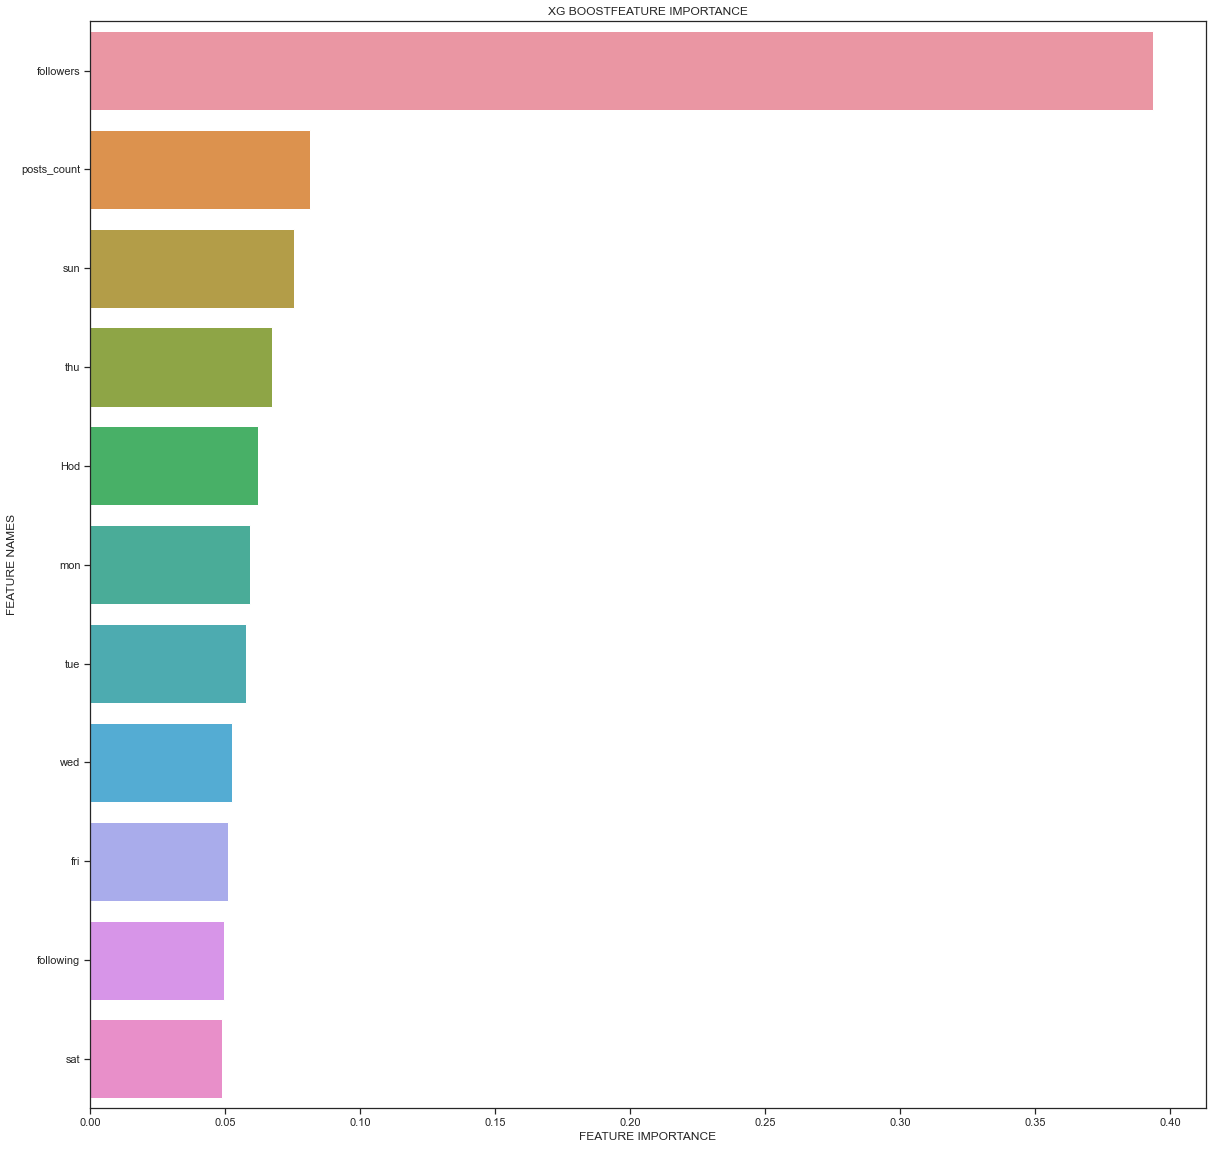

In [209]:
import utils
utils.plot_feature_importance(xg_reg.feature_importances_,X_train.columns,'XG BOOST')

In [210]:
utils.metrics(y_test,y_pred)

RMSE: 0.024497

R2 Score: 0.548620

MAE : 0.009889

MSE : 0.000600

RMSLE : -3.709212

max_error : 0.483999



## Random Forest

In [ ]:
# utils.hyperparameterTuning_RandomForest(X_train,y_train)

In [212]:
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(X_train, y_train)
y_pred_rnd_clf = rnd_clf.predict(X_test)

Feature: 0, Score: 0.09161
Feature: 1, Score: 0.12708
Feature: 2, Score: 0.70200
Feature: 3, Score: 0.03863
Feature: 4, Score: 0.00620
Feature: 5, Score: 0.00575
Feature: 6, Score: 0.00437
Feature: 7, Score: 0.00809
Feature: 8, Score: 0.00479
Feature: 9, Score: 0.00481
Feature: 10, Score: 0.00667


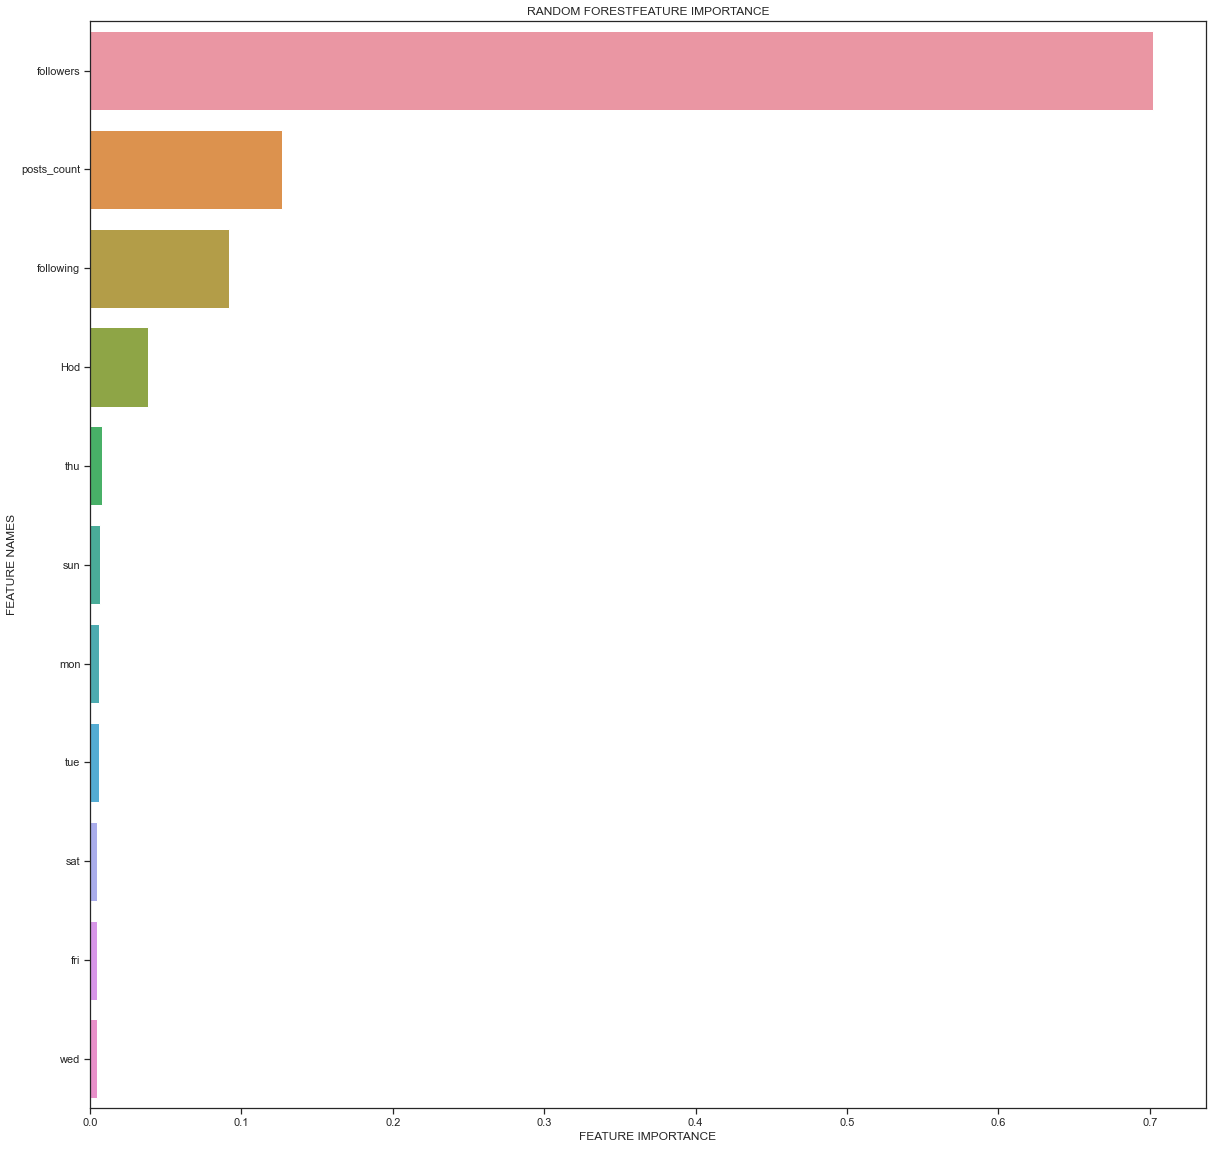

In [213]:
utils.plot_feature_importance(rnd_clf.feature_importances_,X_train.columns,'RANDOM FOREST')

In [214]:
utils.metrics(y_test,y_pred_rnd_clf)


RMSE: 0.023895

R2 Score: 0.570514

MAE : 0.010144

MSE : 0.000571

RMSLE : -3.734072

max_error : 0.493412



## SVC 

In [215]:
# utils.hyperparameterTuning_SVC(X_train,y_train)

In [216]:
svc= LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,tol=0.0001, verbose=0)
svc.fit(X_train, y_train)
y_pred_SVC = svc.predict(X_test)

In [217]:
utils.metrics(y_test,y_pred_SVC)

RMSE: 0.040325

R2 Score: -0.223116

MAE : 0.017223

MSE : 0.001626

RMSLE : -3.210789

max_error : 0.534660

